In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/users/Brandonk87/downloads/housing_train.csv')
data

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,price
0,4306.971093,4,2,3,yes,no,no,no,yes,2,23807.622530
1,4732.863826,4,4,4,yes,no,no,no,yes,3,46173.573550
2,4989.989980,3,2,2,yes,no,yes,no,no,2,25491.220630
3,4330.127019,4,2,2,yes,no,yes,no,yes,3,18941.805220
4,4306.971093,4,1,2,yes,yes,yes,no,yes,2,17582.991230
...,...,...,...,...,...,...,...,...,...,...,...
535,2738.612788,2,1,1,yes,no,yes,no,no,2,5089.329760
536,2449.489743,3,1,1,no,no,no,no,no,0,3117.805748
537,3008.321791,2,1,1,yes,no,no,no,no,0,5225.860608
538,2697.220792,3,1,1,no,no,no,no,no,0,4667.654135


# Adding Dummy Variables

In [3]:
mainroad = pd.get_dummies(data.mainroad)
mainroad = mainroad.rename(columns = {"yes":"mainroad"}).iloc[:,1:]
data = pd.concat([mainroad,data.drop(['mainroad'],axis=1)],axis=1)
data

,mainroad,area,bedrooms,bathrooms,stories,guestroom,basement,hotwaterheating,airconditioning,parking,price
0,1,4306.971093,4,2,3,no,no,no,yes,2,23807.622530
1,1,4732.863826,4,4,4,no,no,no,yes,3,46173.573550
2,1,4989.989980,3,2,2,no,yes,no,no,2,25491.220630
3,1,4330.127019,4,2,2,no,yes,no,yes,3,18941.805220
4,1,4306.971093,4,1,2,yes,yes,no,yes,2,17582.991230
...,...,...,...,...,...,...,...,...,...,...,...
535,1,2738.612788,2,1,1,no,yes,no,no,2,5089.329760
536,0,2449.489743,3,1,1,no,no,no,no,0,3117.805748
537,1,3008.321791,2,1,1,no,no,no,no,0,5225.860608
538,0,2697.220792,3,1,1,no,no,no,no,0,4667.654135


In [4]:
guestroom = pd.get_dummies(data.guestroom)
guestroom = guestroom.rename(columns = {"yes":"guestroom"}).iloc[:,1:]
data = pd.concat([guestroom,data.drop(['guestroom'],axis=1)],axis=1)
data

,guestroom,mainroad,area,bedrooms,bathrooms,stories,basement,hotwaterheating,airconditioning,parking,price
0,0,1,4306.971093,4,2,3,no,no,yes,2,23807.622530
1,0,1,4732.863826,4,4,4,no,no,yes,3,46173.573550
2,0,1,4989.989980,3,2,2,yes,no,no,2,25491.220630
3,0,1,4330.127019,4,2,2,yes,no,yes,3,18941.805220
4,1,1,4306.971093,4,1,2,yes,no,yes,2,17582.991230
...,...,...,...,...,...,...,...,...,...,...,...
535,0,1,2738.612788,2,1,1,yes,no,no,2,5089.329760
536,0,0,2449.489743,3,1,1,no,no,no,0,3117.805748
537,0,1,3008.321791,2,1,1,no,no,no,0,5225.860608
538,0,0,2697.220792,3,1,1,no,no,no,0,4667.654135


In [5]:
basement = pd.get_dummies(data.basement)
basement = basement.rename(columns = {"yes":"basement"}).iloc[:,1:]
data = pd.concat([basement,data.drop(['basement'],axis=1)],axis=1)
data

,basement,guestroom,mainroad,area,bedrooms,bathrooms,stories,hotwaterheating,airconditioning,parking,price
0,0,0,1,4306.971093,4,2,3,no,yes,2,23807.622530
1,0,0,1,4732.863826,4,4,4,no,yes,3,46173.573550
2,1,0,1,4989.989980,3,2,2,no,no,2,25491.220630
3,1,0,1,4330.127019,4,2,2,no,yes,3,18941.805220
4,1,1,1,4306.971093,4,1,2,no,yes,2,17582.991230
...,...,...,...,...,...,...,...,...,...,...,...
535,1,0,1,2738.612788,2,1,1,no,no,2,5089.329760
536,0,0,0,2449.489743,3,1,1,no,no,0,3117.805748
537,0,0,1,3008.321791,2,1,1,no,no,0,5225.860608
538,0,0,0,2697.220792,3,1,1,no,no,0,4667.654135


In [6]:
hotwaterheating = pd.get_dummies(data.hotwaterheating)
hotwaterheating = hotwaterheating.rename(columns = {"yes":"hotwaterheating"}).iloc[:,1:]
data = pd.concat([hotwaterheating,data.drop(['hotwaterheating'],axis=1)],axis=1)
data

,hotwaterheating,basement,guestroom,mainroad,area,bedrooms,bathrooms,stories,airconditioning,parking,price
0,0,0,0,1,4306.971093,4,2,3,yes,2,23807.622530
1,0,0,0,1,4732.863826,4,4,4,yes,3,46173.573550
2,0,1,0,1,4989.989980,3,2,2,no,2,25491.220630
3,0,1,0,1,4330.127019,4,2,2,yes,3,18941.805220
4,0,1,1,1,4306.971093,4,1,2,yes,2,17582.991230
...,...,...,...,...,...,...,...,...,...,...,...
535,0,1,0,1,2738.612788,2,1,1,no,2,5089.329760
536,0,0,0,0,2449.489743,3,1,1,no,0,3117.805748
537,0,0,0,1,3008.321791,2,1,1,no,0,5225.860608
538,0,0,0,0,2697.220792,3,1,1,no,0,4667.654135


In [7]:
airconditioning = pd.get_dummies(data.airconditioning)
airconditioning = airconditioning.rename(columns = {"yes":"airconditioning"}).iloc[:,1:]
data = pd.concat([airconditioning,data.drop(['airconditioning'],axis=1)],axis=1)
data

,airconditioning,hotwaterheating,basement,guestroom,mainroad,area,bedrooms,bathrooms,stories,parking,price
0,1,0,0,0,1,4306.971093,4,2,3,2,23807.622530
1,1,0,0,0,1,4732.863826,4,4,4,3,46173.573550
2,0,0,1,0,1,4989.989980,3,2,2,2,25491.220630
3,1,0,1,0,1,4330.127019,4,2,2,3,18941.805220
4,1,0,1,1,1,4306.971093,4,1,2,2,17582.991230
...,...,...,...,...,...,...,...,...,...,...,...
535,0,0,1,0,1,2738.612788,2,1,1,2,5089.329760
536,0,0,0,0,0,2449.489743,3,1,1,0,3117.805748
537,0,0,0,0,1,3008.321791,2,1,1,0,5225.860608
538,0,0,0,0,0,2697.220792,3,1,1,0,4667.654135


# Model 1: Original Data

In [8]:
lm1 = sm.OLS(data[["price"]],sm.add_constant(data.iloc[:,:10])).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     346.4
Date:                Thu, 13 Oct 2022   Prob (F-statistic):          7.67e-225
Time:                        13:57:54   Log-Likelihood:                -4935.6
No. Observations:                 540   AIC:                             9893.
Df Residuals:                     529   BIC:                             9940.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -1.99e+04    631.814    -

Text(0, 0.5, 'Price')

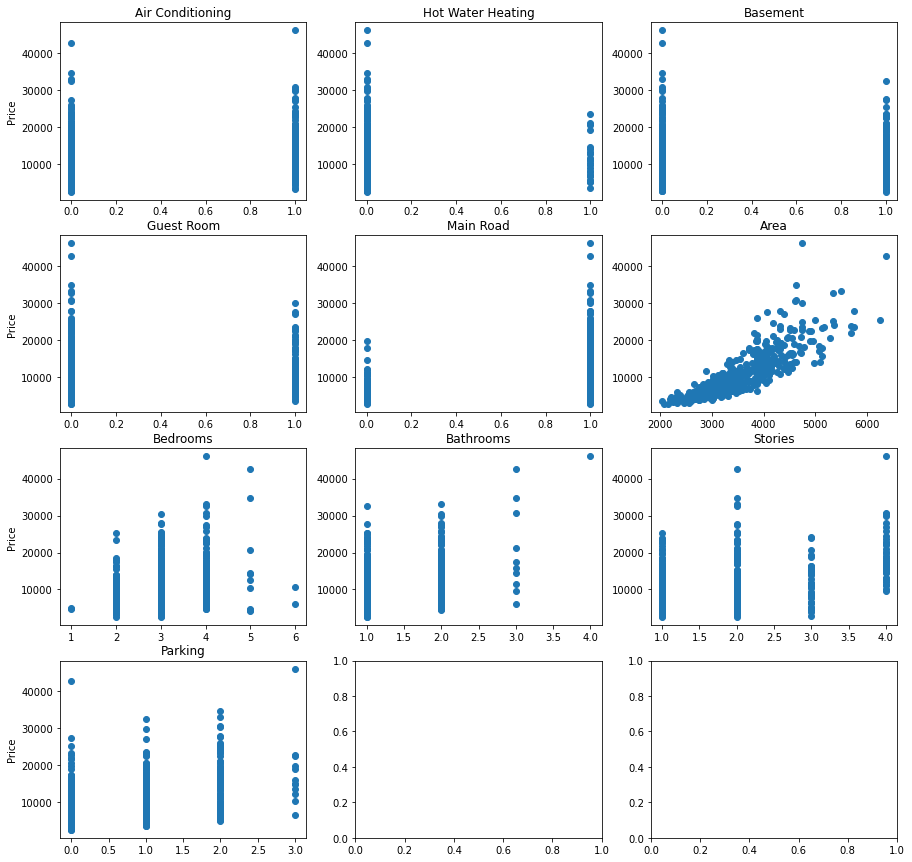

In [9]:
figure, axis = plt.subplots(4,3,figsize=(15,15))

axis[0,0].scatter(data.airconditioning, data.price)
axis[0,0].set_title('Air Conditioning')
axis[0,0].set_ylabel('Price')
axis[0,1].scatter(data.hotwaterheating, data.price)
axis[0,1].set_title('Hot Water Heating')
axis[0,2].scatter(data.basement, data.price)
axis[0,2].set_title('Basement')

axis[1,0].scatter(data.guestroom, data.price)
axis[1,0].set_title('Guest Room')
axis[1,0].set_ylabel('Price')
axis[1,1].scatter(data.mainroad, data.price)
axis[1,1].set_title('Main Road')
axis[1,2].scatter(data.area, data.price)
axis[1,2].set_title('Area')

axis[2,0].scatter(data.bedrooms, data.price)
axis[2,0].set_title('Bedrooms')
axis[2,0].set_ylabel('Price')
axis[2,1].scatter(data.bathrooms, data.price)
axis[2,1].set_title('Bathrooms')
axis[2,2].scatter(data.stories, data.price)
axis[2,2].set_title('Stories')

axis[3,0].scatter(data.parking, data.price)
axis[3,0].set_title('Parking')
axis[3,0].set_ylabel('Price')

Text(0, 0.5, 'Residuals')

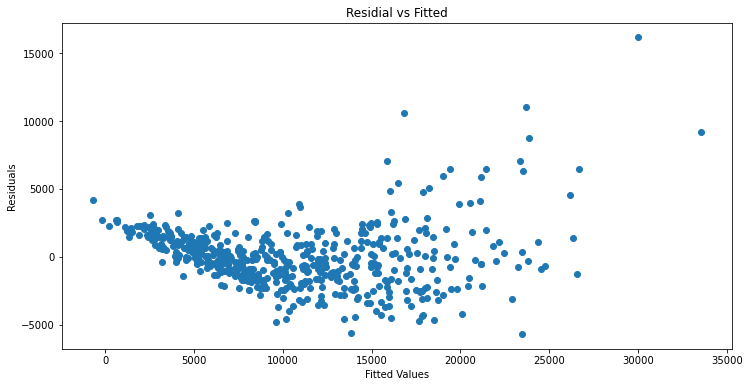

In [10]:
fitted_y=lm1.fittedvalues
residual=lm1.resid
plt.figure(figsize=(12,6))
plt.scatter(fitted_y,residual)
plt.title("Residial vs Fitted")
plt.xlabel("Fitted Values")
plt.ylabel('Residuals')

In [11]:
from scipy import stats
from scipy.stats import kstest
print(stats.shapiro(residual))
print(kstest(residual,'norm'))

ShapiroResult(statistic=0.9154335260391235, pvalue=8.369868718020683e-17)
KstestResult(statistic=0.5222222222222215, pvalue=1.3418327894563294e-137)


Text(0, 0.5, 'Frequency')

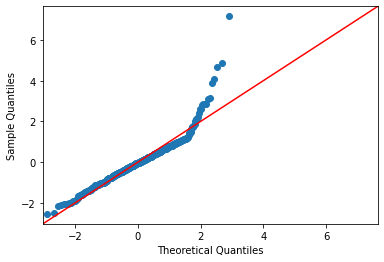

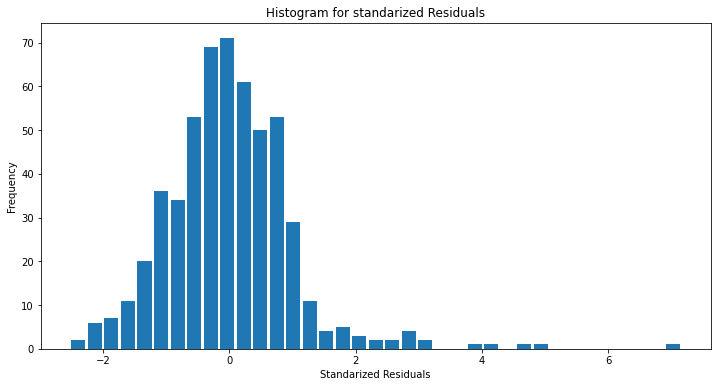

In [12]:
from sklearn.preprocessing import scale
residual_norm=scale(residual)
sm.qqplot(residual_norm,line='45')
plt.figure(figsize=(12,6))
plt.hist(x=residual_norm,bins='auto',rwidth=0.85)
plt.title("Histogram for standarized Residuals")
plt.xlabel("Standarized Residuals")
plt.ylabel("Frequency")

# Model 2: __ Transformation of the "Area" Independent Variable

In [13]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
area = poly.fit_transform(data[["area"]])
area = pd.DataFrame(area[:,1:], columns = ['area_1','area_2' ,'area_3'])

data2 = pd.concat([area, data[['bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement',
                                  'hotwaterheating', 'airconditioning', 'parking', 'price']]], axis=1)
data2

,area_1,area_2,area_3,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,price
0,4306.971093,1.855000e+07,7.989431e+10,4,2,3,1,0,0,0,1,2,23807.622530
1,4732.863826,2.240000e+07,1.060161e+11,4,4,4,1,0,0,0,1,3,46173.573550
2,4989.989980,2.490000e+07,1.242508e+11,3,2,2,1,0,1,0,0,2,25491.220630
3,4330.127019,1.875000e+07,8.118988e+10,4,2,2,1,0,1,0,1,3,18941.805220
4,4306.971093,1.855000e+07,7.989431e+10,4,1,2,1,1,1,0,1,2,17582.991230
...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,2738.612788,7.500000e+06,2.053960e+10,2,1,1,1,0,1,0,0,2,5089.329760
536,2449.489743,6.000000e+06,1.469694e+10,3,1,1,0,0,0,0,0,0,3117.805748
537,3008.321791,9.050000e+06,2.722531e+10,2,1,1,1,0,0,0,0,0,5225.860608
538,2697.220792,7.275000e+06,1.962228e+10,3,1,1,0,0,0,0,0,0,4667.654135


Text(0.5, 1.0, 'area 3')

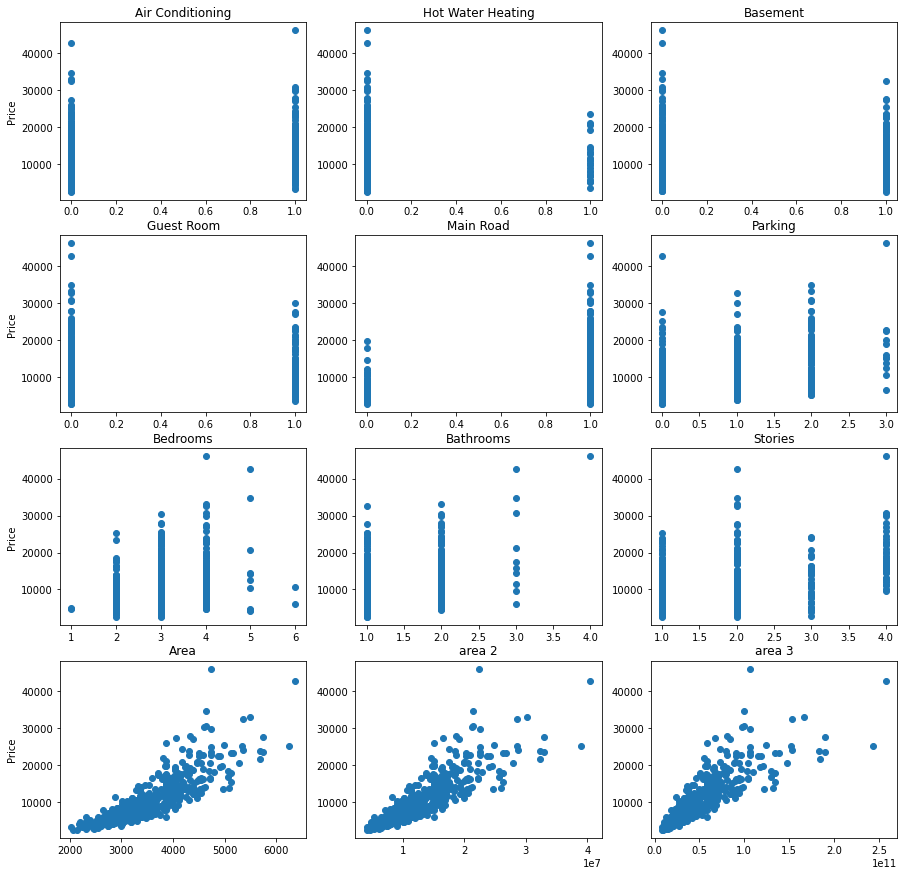

In [14]:
figure, axis = plt.subplots(4,3,figsize=(15,15))

axis[0,0].scatter(data.airconditioning, data.price)
axis[0,0].set_title('Air Conditioning')
axis[0,0].set_ylabel('Price')
axis[0,1].scatter(data.hotwaterheating, data.price)
axis[0,1].set_title('Hot Water Heating')
axis[0,2].scatter(data.basement, data.price)
axis[0,2].set_title('Basement')

axis[1,0].scatter(data.guestroom, data.price)
axis[1,0].set_title('Guest Room')
axis[1,0].set_ylabel('Price')
axis[1,1].scatter(data.mainroad, data.price)
axis[1,1].set_title('Main Road')
axis[1,2].scatter(data.parking, data.price)
axis[1,2].set_title('Parking')


axis[2,0].scatter(data.bedrooms, data.price)
axis[2,0].set_title('Bedrooms')
axis[2,0].set_ylabel('Price')
axis[2,1].scatter(data.bathrooms, data.price)
axis[2,1].set_title('Bathrooms')
axis[2,2].scatter(data.stories, data.price)
axis[2,2].set_title('Stories')

axis[3,0].scatter(data.area, data.price)
axis[3,0].set_title('Area')
axis[3,0].set_ylabel('Price')
axis[3,1].scatter(data2.area_2, data2.price)
axis[3,1].set_title('area 2')
axis[3,2].scatter(data2.area_3, data2.price)
axis[3,2].set_title('area 3')


In [15]:
lm2 = sm.OLS(data2[["price"]],sm.add_constant(data2.iloc[:,:12])).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     316.9
Date:                Thu, 13 Oct 2022   Prob (F-statistic):          5.77e-232
Time:                        13:57:59   Log-Likelihood:                -4912.7
No. Observations:                 540   AIC:                             9851.
Df Residuals:                     527   BIC:                             9907.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2708.3526   6310.601     

Text(0, 0.5, 'Residuals')

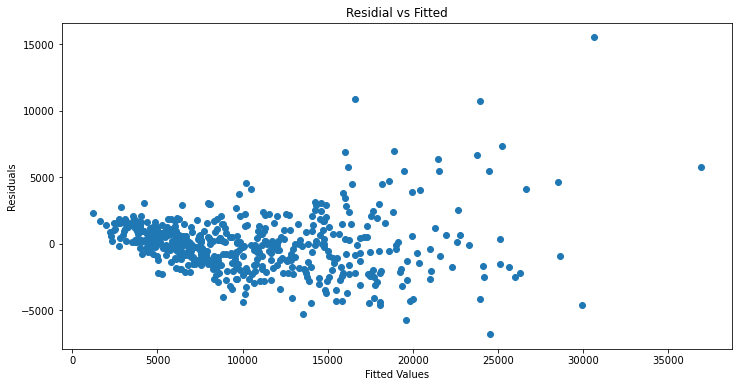

In [16]:
fitted_y=lm2.fittedvalues
residual=lm2.resid
plt.figure(figsize=(12,6))
plt.scatter(fitted_y,residual)
plt.title("Residial vs Fitted")
plt.xlabel("Fitted Values")
plt.ylabel('Residuals')

Text(0, 0.5, 'Frequency')

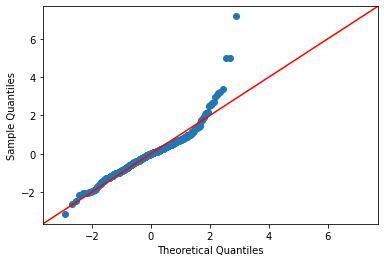

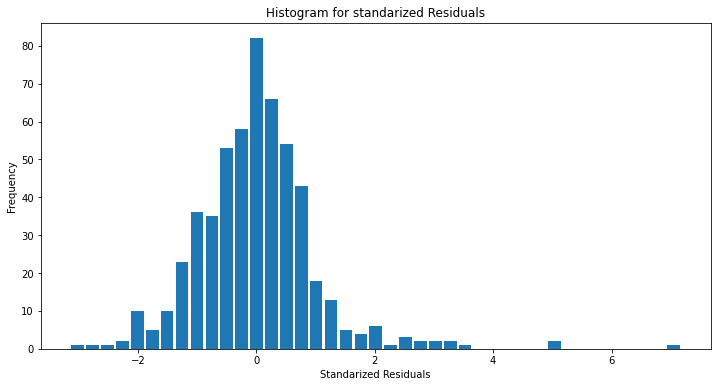

In [17]:
from sklearn.preprocessing import scale
residual_norm=scale(residual)
sm.qqplot(residual_norm,line='45')
plt.figure(figsize=(12,6))
plt.hist(x=residual_norm,bins='auto',rwidth=0.85)
plt.title("Histogram for standarized Residuals")
plt.xlabel("Standarized Residuals")
plt.ylabel("Frequency")

In [18]:
from scipy import stats
from scipy.stats import kstest
print(stats.shapiro(residual))
print(kstest(residual,'norm'))

ShapiroResult(statistic=0.9198814630508423, pvalue=2.467956752674104e-16)
KstestResult(statistic=0.5018518498148753, pvalue=2.3669669382631053e-126)


# Model 3: Log Transform of Response Variable

In [19]:
price = np.log(data2[["price"]])
price = price.rename(columns={"price": "Log_price"})
data3 = pd.concat([data2[['area_1', 'area_2', 'area_3', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement',
                                  'hotwaterheating', 'airconditioning', 'parking']], price], axis=1)
data3

,area_1,area_2,area_3,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,Log_price
0,4306.971093,1.855000e+07,7.989431e+10,4,2,3,1,0,0,0,1,2,10.077761
1,4732.863826,2.240000e+07,1.060161e+11,4,4,4,1,0,0,0,1,3,10.740163
2,4989.989980,2.490000e+07,1.242508e+11,3,2,2,1,0,1,0,0,2,10.146089
3,4330.127019,1.875000e+07,8.118988e+10,4,2,2,1,0,1,0,1,3,9.849127
4,4306.971093,1.855000e+07,7.989431e+10,4,1,2,1,1,1,0,1,2,9.774687
...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,2738.612788,7.500000e+06,2.053960e+10,2,1,1,1,0,1,0,0,2,8.534901
536,2449.489743,6.000000e+06,1.469694e+10,3,1,1,0,0,0,0,0,0,8.044885
537,3008.321791,9.050000e+06,2.722531e+10,2,1,1,1,0,0,0,0,0,8.561375
538,2697.220792,7.275000e+06,1.962228e+10,3,1,1,0,0,0,0,0,0,8.448412


In [20]:
lm3 = sm.OLS(data3[["Log_price"]],sm.add_constant(data3.iloc[:,:12])).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:              Log_price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     517.7
Date:                Thu, 13 Oct 2022   Prob (F-statistic):          1.73e-282
Time:                        13:58:00   Log-Likelihood:                 255.47
No. Observations:                 540   AIC:                            -484.9
Df Residuals:                     527   BIC:                            -429.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               5.0875      0.440     

Text(0, 0.5, 'Residuals')

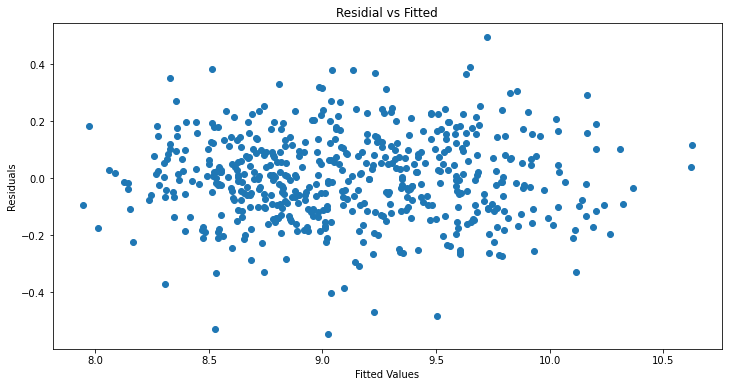

In [21]:
fitted_y=lm3.fittedvalues
residual=lm3.resid
plt.figure(figsize=(12,6))
plt.scatter(fitted_y,residual)
plt.title("Residial vs Fitted")
plt.xlabel("Fitted Values")
plt.ylabel('Residuals')

Text(0, 0.5, 'Frequency')

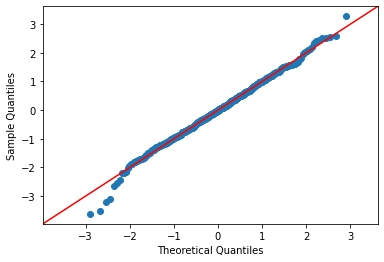

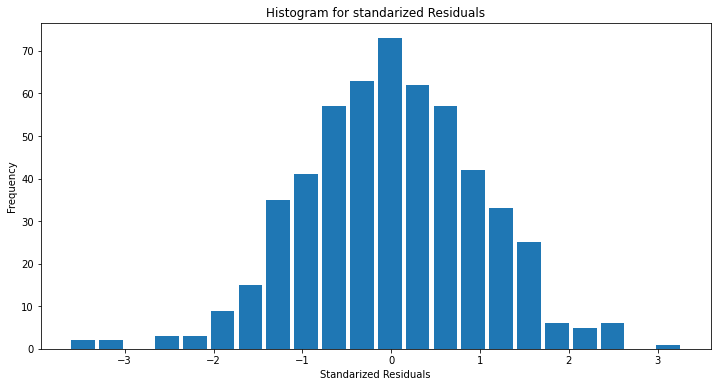

In [22]:
from sklearn.preprocessing import scale
residual_norm=scale(residual)
sm.qqplot(residual_norm,line='45')
plt.figure(figsize=(12,6))
plt.hist(x=residual_norm,bins='auto',rwidth=0.85)
plt.title("Histogram for standarized Residuals")
plt.xlabel("Standarized Residuals")
plt.ylabel("Frequency")

In [23]:
from scipy import stats
from scipy.stats import kstest
print(stats.shapiro(residual))
print(kstest(residual,'norm'))

ShapiroResult(statistic=0.9956801533699036, pvalue=0.14255473017692566)
KstestResult(statistic=0.36716777272467066, pvalue=8.738140104072954e-66)


# Model 4: Box Cox Transformation

In [24]:
import scipy.stats as stats
Z, fit_lambda = stats.boxcox(data.price)
print(fit_lambda)

-0.18372436055672342


In [25]:
import statsmodels.api as sm
lm4=sm.OLS(Z, sm.add_constant(data2.iloc[:,:12])).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     500.7
Date:                Thu, 13 Oct 2022   Prob (F-statistic):          5.48e-279
Time:                        13:58:01   Log-Likelihood:                 1154.6
No. Observations:                 540   AIC:                            -2283.
Df Residuals:                     527   BIC:                            -2227.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.5023      0.083     

Text(0, 0.5, 'Residuals')

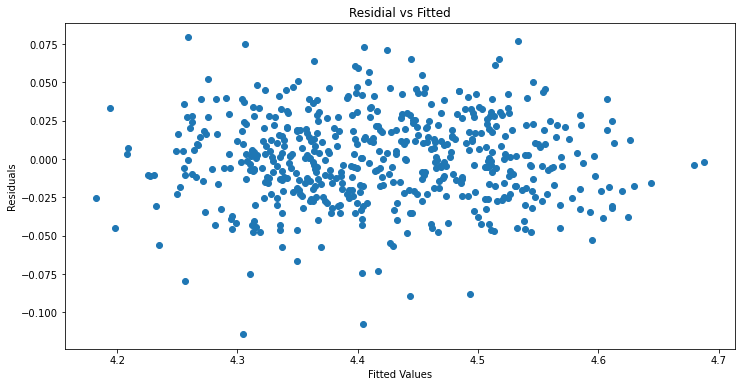

In [26]:
fitted_y=lm4.fittedvalues
residual=lm4.resid
plt.figure(figsize=(12,6))
plt.scatter(fitted_y,residual)
plt.title("Residial vs Fitted")
plt.xlabel("Fitted Values")
plt.ylabel('Residuals')

Text(0, 0.5, 'Frequency')

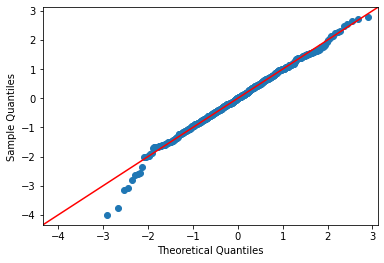

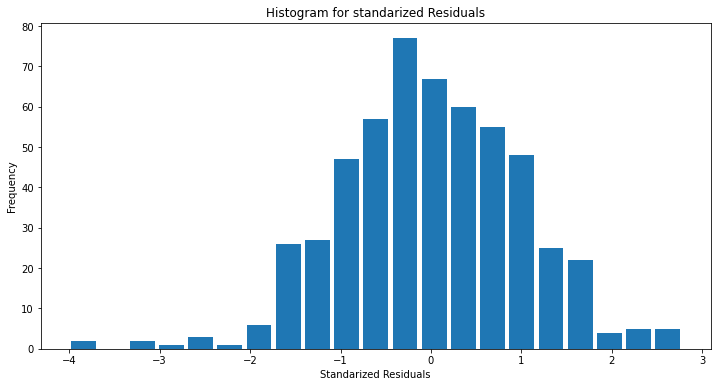

In [27]:
from sklearn.preprocessing import scale
residual_norm=scale(residual)
sm.qqplot(residual_norm,line='45')
plt.figure(figsize=(12,6))
plt.hist(x=residual_norm,bins='auto',rwidth=0.85)
plt.title("Histogram for standarized Residuals")
plt.xlabel("Standarized Residuals")
plt.ylabel("Frequency")

In [28]:
from scipy import stats
from scipy.stats import kstest
print(stats.shapiro(residual))
print(kstest(residual,'norm'))

ShapiroResult(statistic=0.992944598197937, pvalue=0.012153210118412971)
KstestResult(statistic=0.4684202194951149, pvalue=3.749227532876264e-109)


# Model 2_1

In [29]:
price = np.log(data2[["price"]])
price = price.rename(columns={"price": "Log_price"})
data2_1 = pd.concat([data2[['area_1', 'area_2', 'area_3', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement',
                                  'hotwaterheating', 'airconditioning', 'parking']], price], axis=1)
data2_1

,area_1,area_2,area_3,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,Log_price
0,4306.971093,1.855000e+07,7.989431e+10,4,2,3,1,0,0,0,1,2,10.077761
1,4732.863826,2.240000e+07,1.060161e+11,4,4,4,1,0,0,0,1,3,10.740163
2,4989.989980,2.490000e+07,1.242508e+11,3,2,2,1,0,1,0,0,2,10.146089
3,4330.127019,1.875000e+07,8.118988e+10,4,2,2,1,0,1,0,1,3,9.849127
4,4306.971093,1.855000e+07,7.989431e+10,4,1,2,1,1,1,0,1,2,9.774687
...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,2738.612788,7.500000e+06,2.053960e+10,2,1,1,1,0,1,0,0,2,8.534901
536,2449.489743,6.000000e+06,1.469694e+10,3,1,1,0,0,0,0,0,0,8.044885
537,3008.321791,9.050000e+06,2.722531e+10,2,1,1,1,0,0,0,0,0,8.561375
538,2697.220792,7.275000e+06,1.962228e+10,3,1,1,0,0,0,0,0,0,8.448412


In [30]:
lm2_1 = sm.OLS(data2_1[["Log_price"]],sm.add_constant(data2_1.iloc[:,:12])).fit()
print(lm2_1.summary())

                            OLS Regression Results                            
Dep. Variable:              Log_price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     517.7
Date:                Thu, 13 Oct 2022   Prob (F-statistic):          1.73e-282
Time:                        13:58:01   Log-Likelihood:                 255.47
No. Observations:                 540   AIC:                            -484.9
Df Residuals:                     527   BIC:                            -429.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               5.0875      0.440     

# Model 2_2: Best Subset Selection

In [31]:
import itertools

def fit_lm(feature_set):
    lm2_2 = sm.OLS(data2_1.Log_price, sm.add_constant(data2_1[list(feature_set)])).fit()
    RSS = ((lm2_2.predict(sm.add_constant(data2_1[list(feature_set)])) - data2_1.Log_price) ** 2).sum()
    rsquared_adj = lm2_2.rsquared_adj
    AIC = lm2_2.aic
    BIC = lm2_2.bic
    return {"model":lm2_2, "RSS":RSS, "Rsquared_adj": rsquared_adj, "AIC":AIC, "BIC": BIC}

def getbest(k):
    result = []
    for combo in itertools.combinations(data2_1.columns[:-1], k):
        result.append(fit_lm(combo))
    models = pd.DataFrame(result)
    best_model = models.loc[models['RSS'].argmin()]
    return best_model

import time
models_best = pd.DataFrame(columns=["model","RSS","Rsquared_adj", "AIC","BIC"])
start = time.time()
for i in range(1,13):
    models_best.loc[i] = getbest(i)
end = time.time()
print(models_best)
print("Best subset selection takes:", end-start, "seconds")

                                                model        RSS Rsquared_adj  \
1   <statsmodels.regression.linear_model.Regressio...  35.086933     0.776033   
2   <statsmodels.regression.linear_model.Regressio...   23.92068     0.847025   
3   <statsmodels.regression.linear_model.Regressio...  18.937242     0.878668   
4   <statsmodels.regression.linear_model.Regressio...  15.758463     0.898846   
5   <statsmodels.regression.linear_model.Regressio...  13.984231     0.910067   
6   <statsmodels.regression.linear_model.Regressio...  12.763414     0.917764   
7   <statsmodels.regression.linear_model.Regressio...  12.396046     0.919981   
8   <statsmodels.regression.linear_model.Regressio...  12.299917     0.920452   
9   <statsmodels.regression.linear_model.Regressio...  12.285262     0.920397   
10  <statsmodels.regression.linear_model.Regressio...  12.279361     0.920285   
11  <statsmodels.regression.linear_model.Regressio...   12.27431     0.920167   
12  <statsmodels.regression.

In [32]:
print(models_best.loc[8, "model"].summary())

                            OLS Regression Results                            
Dep. Variable:              Log_price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     780.6
Date:                Thu, 13 Oct 2022   Prob (F-statistic):          6.18e-288
Time:                        13:58:39   Log-Likelihood:                 254.91
No. Observations:                 540   AIC:                            -491.8
Df Residuals:                     531   BIC:                            -453.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               5.2895      0.130     

Text(0, 0.5, 'BIC')

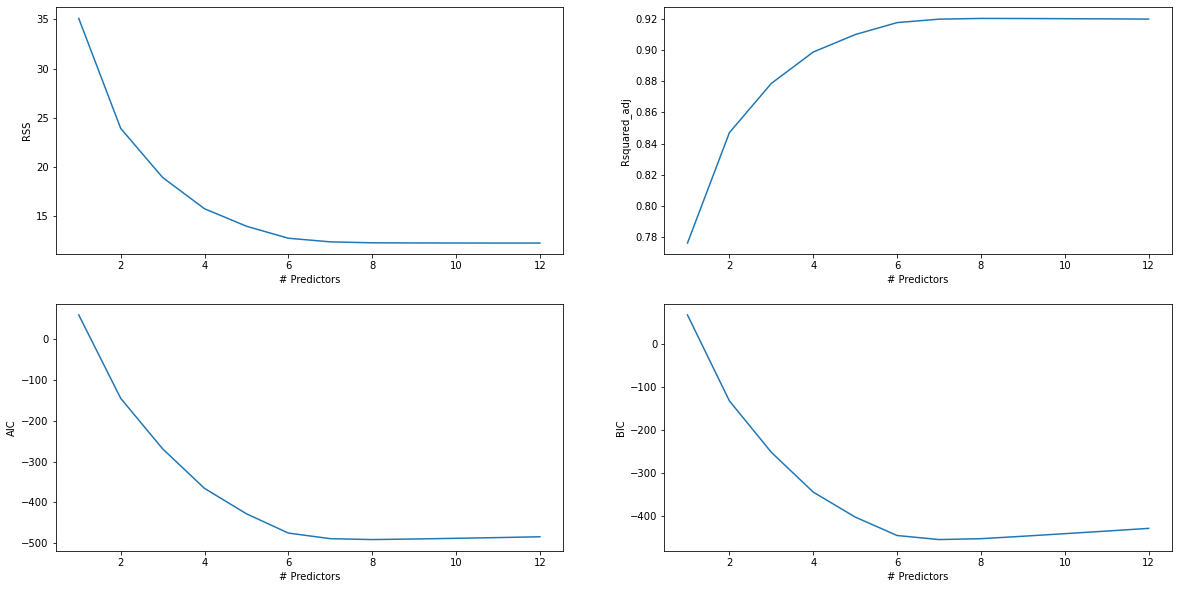

In [33]:
plt.figure(figsize=(20,10))
plt_rss = plt.subplot(2,2,1)
plt.plot(models_best["RSS"])
plt.xlabel("# Predictors")
plt.ylabel("RSS")
plt.subplot(2,2,2)
plt.plot(models_best["Rsquared_adj"])
plt.xlabel("# Predictors")
plt.ylabel("Rsquared_adj")
plt.subplot(2,2,3)
plt.plot(models_best["AIC"])
plt.xlabel("# Predictors")
plt.ylabel('AIC')
plt.subplot(2,2,4)
plt.plot(models_best["BIC"])
plt.xlabel('# Predictors')
plt.ylabel("BIC")

# Model 2_3: Forward Selection

In [34]:
remain = list(data2_1.columns[:-1])
picked = list()
models_best = pd.DataFrame(columns=["model", "RSS", "Rsquared_adj", "AIC", "BIC"])
start = time.time()
for i in range(1,12):
    best_RSS = np.inf
    for combo in itertools.combinations(remain,1):
        RSS = fit_lm(list(combo) + picked)["RSS"]
        if RSS < best_RSS:
            best_RSS = RSS
            best_feature = combo[0]
            models_best.loc[i] = fit_lm(list(combo) + picked)
    picked.append(best_feature)
    remain.remove(best_feature)
end = time.time()
print(models_best)
print("Forward selection takes:", end-start, "seconds")
print(models_best.loc[8,"model"].summary())

                                                model        RSS  \
1   <statsmodels.regression.linear_model.Regressio...  35.086933   
2   <statsmodels.regression.linear_model.Regressio...  23.920680   
3   <statsmodels.regression.linear_model.Regressio...  18.937242   
4   <statsmodels.regression.linear_model.Regressio...  15.758463   
5   <statsmodels.regression.linear_model.Regressio...  13.984231   
6   <statsmodels.regression.linear_model.Regressio...  12.763414   
7   <statsmodels.regression.linear_model.Regressio...  12.396046   
8   <statsmodels.regression.linear_model.Regressio...  12.299917   
9   <statsmodels.regression.linear_model.Regressio...  12.285262   
10  <statsmodels.regression.linear_model.Regressio...  12.279361   
11  <statsmodels.regression.linear_model.Regressio...  12.274310   

    Rsquared_adj         AIC         BIC  
1       0.776033   60.233821   68.816959  
2       0.847025 -144.632304 -131.757597  
3       0.878668 -268.783283 -251.617007  
4       0.8

# Model 2_4: Backward Selection

In [35]:
pick = list(data2_1.columns[:-1])
models_best = pd.DataFrame(columns=["model", "RSS", "Rsquared_adj", "AIC", "BIC"])
models_best.loc[0] = fit_lm(pick)
start = time.time()
for i in range (1,11):
    best_RSS = np.inf
    for combo in itertools.combinations(pick,len(pick)-1):
        RSS = fit_lm(list(combo))["RSS"]
        if RSS < best_RSS:
            best_RSS = RSS
            best_feature = combo
            models_best.loc[i] = fit_lm(list(combo))
        pick = best_feature
end = time.time()
print(models_best)
print("Backward selection takes:", end-start, 'seconds')
print(models_best.loc[4,"model"].summary())

                                                model        RSS  \
0   <statsmodels.regression.linear_model.Regressio...  12.274167   
1   <statsmodels.regression.linear_model.Regressio...  12.274310   
2   <statsmodels.regression.linear_model.Regressio...  12.279361   
3   <statsmodels.regression.linear_model.Regressio...  12.285262   
4   <statsmodels.regression.linear_model.Regressio...  12.299917   
5   <statsmodels.regression.linear_model.Regressio...  12.396046   
6   <statsmodels.regression.linear_model.Regressio...  12.763414   
7   <statsmodels.regression.linear_model.Regressio...  13.984231   
8   <statsmodels.regression.linear_model.Regressio...  15.758463   
9   <statsmodels.regression.linear_model.Regressio...  18.937242   
10  <statsmodels.regression.linear_model.Regressio...  23.920680   

    Rsquared_adj         AIC         BIC  
0       0.920016 -484.945463 -429.155064  
1       0.920167 -486.939153 -435.440323  
2       0.920285 -488.716969 -441.509708  
3       0.9

# Model 2_3: Forward Selection

In [36]:
remain = list(data2_1.columns[:-1])
picked = list()
models_best = pd.DataFrame(columns=["model", "RSS", "Rsquared_adj", "AIC", "BIC"])
start = time.time()
for i in range(1,12):
    best_RSS = np.inf
    for combo in itertools.combinations(remain,1):
        RSS = fit_lm(list(combo) + picked)["RSS"]
        if RSS < best_RSS:
            best_RSS = RSS
            best_feature = combo[0]
            models_best.loc[i] = fit_lm(list(combo) + picked)
    picked.append(best_feature)
    remain.remove(best_feature)
end = time.time()
print(models_best)
print("Forward selection takes:", end-start, "seconds")
print(models_best.loc[8,"model"].summary())

                                                model        RSS  \
1   <statsmodels.regression.linear_model.Regressio...  35.086933   
2   <statsmodels.regression.linear_model.Regressio...  23.920680   
3   <statsmodels.regression.linear_model.Regressio...  18.937242   
4   <statsmodels.regression.linear_model.Regressio...  15.758463   
5   <statsmodels.regression.linear_model.Regressio...  13.984231   
6   <statsmodels.regression.linear_model.Regressio...  12.763414   
7   <statsmodels.regression.linear_model.Regressio...  12.396046   
8   <statsmodels.regression.linear_model.Regressio...  12.299917   
9   <statsmodels.regression.linear_model.Regressio...  12.285262   
10  <statsmodels.regression.linear_model.Regressio...  12.279361   
11  <statsmodels.regression.linear_model.Regressio...  12.274310   

    Rsquared_adj         AIC         BIC  
1       0.776033   60.233821   68.816959  
2       0.847025 -144.632304 -131.757597  
3       0.878668 -268.783283 -251.617007  
4       0.8

# Model 2_5: K Fold Cross Validation of Forward Selection

In [37]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

cv = KFold(n_splits=10, random_state=1, shuffle=True)
mse = []

for i in range(1, 12):
    x = data2_1[models_best.loc[i, "model"].params.index[1:]]
    y = data2_1.iloc[:,12]
    error = []
    
    for train_index, test_index in cv.split(data):
        x_train, x_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        ols = sm.OLS(y_train, sm.add_constant(x_train))
        lm = ols.fit()
        y_pred = lm.predict(sm.add_constant(x_test))
        error.append(mean_squared_error(y_pred,y_test))
    mse.append(np.mean(error))

In [38]:
for i in range (1,12):
    print(i)
    print(mse[i-1])

1
0.06566933229717062
2
0.044975773513365944
3
0.03555603301490594
4
0.02981012430389095
5
0.02644323153794913
6
0.024408389448011065
7
0.023718207105443208
8
0.023560203367327476
9
0.023610191478123693
10
0.023608449583760217
11
0.02363500789993022


In [39]:
print(models_best.loc[8,"model"].summary())

                            OLS Regression Results                            
Dep. Variable:              Log_price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     780.6
Date:                Thu, 13 Oct 2022   Prob (F-statistic):          6.18e-288
Time:                        13:58:44   Log-Likelihood:                 254.91
No. Observations:                 540   AIC:                            -491.8
Df Residuals:                     531   BIC:                            -453.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               5.2895      0.130     

# Training Testing Validation

In [66]:
data_test = pd.read_csv('/users/brandonk87/downloads/housing_test.csv')
data_test 

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,price
0,3391.164992,3,2,2,yes,yes,no,no,yes,2,13648.38942
1,4006.245125,3,2,2,yes,no,no,no,yes,1,17305.14429
2,3286.335345,3,1,2,yes,no,yes,yes,no,2,10205.51922
3,4229.361654,3,2,1,yes,yes,yes,no,yes,2,17321.41596
4,4486.089611,3,1,1,yes,yes,yes,no,yes,1,15862.92477


In [67]:
guestroom = pd.get_dummies(data_test.guestroom)
guestroom = guestroom.rename(columns = {"yes":"guestroom"}).iloc[:,1:]
data_test = pd.concat([guestroom,data_test.drop(['guestroom'],axis=1)],axis=1)
data_test

basement = pd.get_dummies(data_test.basement)
basement = basement.rename(columns = {"yes":"basement"}).iloc[:,1:]
data_test = pd.concat([basement,data_test.drop(['basement'],axis=1)],axis=1)
data_test

hotwaterheating = pd.get_dummies(data_test.hotwaterheating)
hotwaterheating = hotwaterheating.rename(columns = {"yes":"hotwaterheating"}).iloc[:,1:]
data_test = pd.concat([hotwaterheating,data_test.drop(['hotwaterheating'],axis=1)],axis=1)
data_test

airconditioning = pd.get_dummies(data_test.airconditioning)
airconditioning = airconditioning.rename(columns = {"yes":"airconditioning"}).iloc[:,1:]
data_test = pd.concat([airconditioning,data_test.drop(['airconditioning'],axis=1)],axis=1)
data_test

mainroad = pd.get_dummies(data_test.mainroad)
mainroad = mainroad.rename(columns = {"yes":"mainroad"})
data_test = pd.concat([mainroad,data_test.drop(['mainroad'],axis=1)],axis=1)
data_test

,mainroad,airconditioning,hotwaterheating,basement,guestroom,area,bedrooms,bathrooms,stories,parking,price
0,1,1,0,0,1,3391.164992,3,2,2,2,13648.38942
1,1,1,0,0,0,4006.245125,3,2,2,1,17305.14429
2,1,0,1,1,0,3286.335345,3,1,2,2,10205.51922
3,1,1,0,1,1,4229.361654,3,2,1,2,17321.41596
4,1,1,0,1,1,4486.089611,3,1,1,1,15862.92477


In [68]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
area = poly.fit_transform(data_test[["area"]])
area = pd.DataFrame(area[:,1:], columns = ['area_1','area_2' ,'area_3'])

data_test = pd.concat([area, data_test[['bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement',
                                  'hotwaterheating', 'airconditioning', 'parking', 'price']]], axis=1)
data_test

,area_1,area_2,area_3,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,price
0,3391.164992,1.150000e+07,3.899840e+10,3,2,2,1,1,0,0,1,2,13648.38942
1,4006.245125,1.605000e+07,6.430023e+10,3,2,2,1,0,0,0,1,1,17305.14429
2,3286.335345,1.080000e+07,3.549242e+10,3,1,2,1,0,1,1,0,2,10205.51922
3,4229.361654,1.788750e+07,7.565271e+10,3,2,1,1,1,1,0,1,2,17321.41596
4,4486.089611,2.012500e+07,9.028255e+10,3,1,1,1,1,1,0,1,1,15862.92477


In [69]:
from sklearn.metrics import mean_squared_error
error1 = []

x = data2_1.iloc[:,:12]
y = data2_1.iloc[:,12:]

x_test = data_test.iloc[:,:12]
y_test = data_test.iloc[:,12]
    
lm2_1 = sm.OLS(y, sm.add_constant(data2_1[["area_1", 'area_2','bedrooms', 'bathrooms', 
                        'stories', 'basement', 'airconditioning','parking']])).fit()
y_pred1 = np.exp(lm2_1.predict(sm.add_constant(data_test[["area_1", 'area_2','bedrooms', 'bathrooms', 
                        'stories', 'basement', 'airconditioning','parking']],has_constant = 'add')))
error1 = (mean_squared_error(y_pred1,(data_test[['price']])))

print(error1)

5203676.97676914
